In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [11]:
with open('tom_1.txt', 'r') as f:
    text = f.read().lower()
text = re.sub('[^а-я]','', text)

In [12]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [13]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [14]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [15]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [16]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

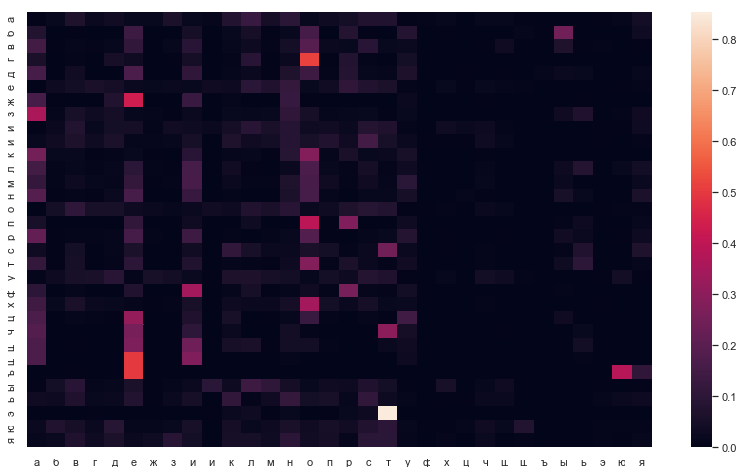

In [17]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [9]:
string = "hello"
proba = 1.0 / 26
for cp, cn in zip(string[1:], string[:-1]):
    proba *= probabilities[POS[cp], POS[cn]]
print(proba)

5.348363016330027e-07


In [19]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
for c in RUSSIAN:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], end]
    if proba > 0:
        print(''.join(['п', c, c, 'р']), proba)

паар 7.437443018753046e-05
пббр 1.8643618058823691e-07
пввр 3.9339597951581894e-08
пггр 1.5959232799171646e-06
пддр 1.825237572040087e-07
пеер 0.0003782881341089731
пиир 2.343978790613907e-05
пккр 5.791239616523416e-06
пллр 7.273448605706631e-06
пннр 1.9687218854934034e-07
поор 0.0008537372563590088
пппр 3.158075870090507e-05
пррр 1.745393245768668e-05
псср 1.2774484825176944e-07
пттр 4.505300330200833e-06
пуур 2.8943828954578754e-05
пффр 5.841879553745113e-07
пццр 3.1089184972890727e-09
пччр 2.7676699192126746e-08
пшшр 1.0653561479210364e-08
пыыр 7.703377270861521e-06
пььр 1.178004617933018e-05
пээр 8.877095371784295e-08
пяяр 6.822493890035045e-06


In [66]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)
    b = str(''.join(s))
print (b.capitalize())

Бырьядеоч


In [67]:
from hmmlearn.hmm import GaussianHMM

In [68]:
series = pd.read_csv("weekly-closings-of-the-dowjones-.csv")["Close"]

In [69]:
values = series.values.reshape(-1,1)

In [117]:
for n in range(1, 10):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582104
2 -820.6341453620576
3 -786.8374189914178
4 -752.0201472668956
5 -737.1181111930914
6 -729.5671112589441
7 -713.7233991717012
8 -702.1073061994866
9 -690.9838068209683


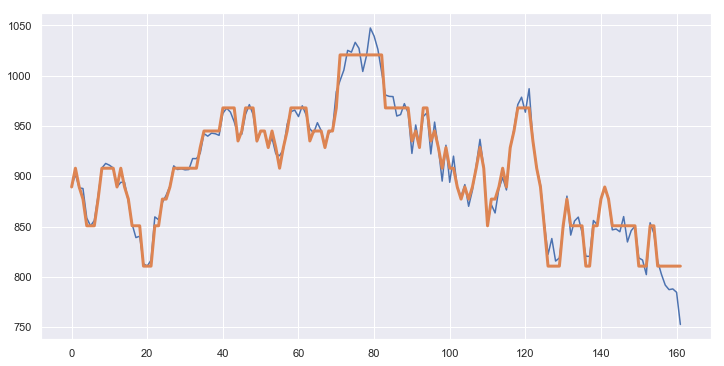

In [118]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [119]:
model.score(values)

-688.7611279337816

In [120]:
model.predict(values)

array([0, 6, 0, 2, 9, 9, 9, 2, 6, 6, 6, 6, 0, 6, 0, 2, 9, 9, 9, 4, 4, 4,
       9, 9, 2, 2, 0, 6, 6, 6, 6, 6, 6, 6, 8, 7, 7, 7, 7, 7, 1, 1, 1, 1,
       3, 7, 1, 1, 1, 3, 7, 7, 8, 7, 8, 6, 8, 7, 1, 1, 1, 1, 1, 3, 7, 7,
       7, 8, 7, 7, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1,
       1, 1, 3, 7, 8, 1, 1, 3, 7, 8, 6, 8, 6, 6, 0, 2, 0, 2, 0, 6, 8, 6,
       9, 2, 2, 0, 6, 0, 8, 7, 1, 1, 1, 1, 3, 6, 0, 9, 4, 4, 4, 4, 9, 2,
       9, 9, 9, 9, 4, 4, 9, 9, 2, 0, 2, 9, 9, 9, 9, 9, 9, 9, 4, 4, 4, 9,
       9, 4, 4, 4, 4, 4, 4, 4])

In [123]:
prob_next_step = model.transmat_[labels[-1], :]
prob_next_step

array([2.64820366e-132, 0.00000000e+000, 1.06344977e-044, 6.82731371e-275,
       7.75524785e-001, 0.00000000e+000, 8.37411203e-150, 0.00000000e+000,
       1.51545358e-298, 2.24475215e-001])

In [124]:
model.transmat_.shape

(10, 10)